Without Gaussian Noise

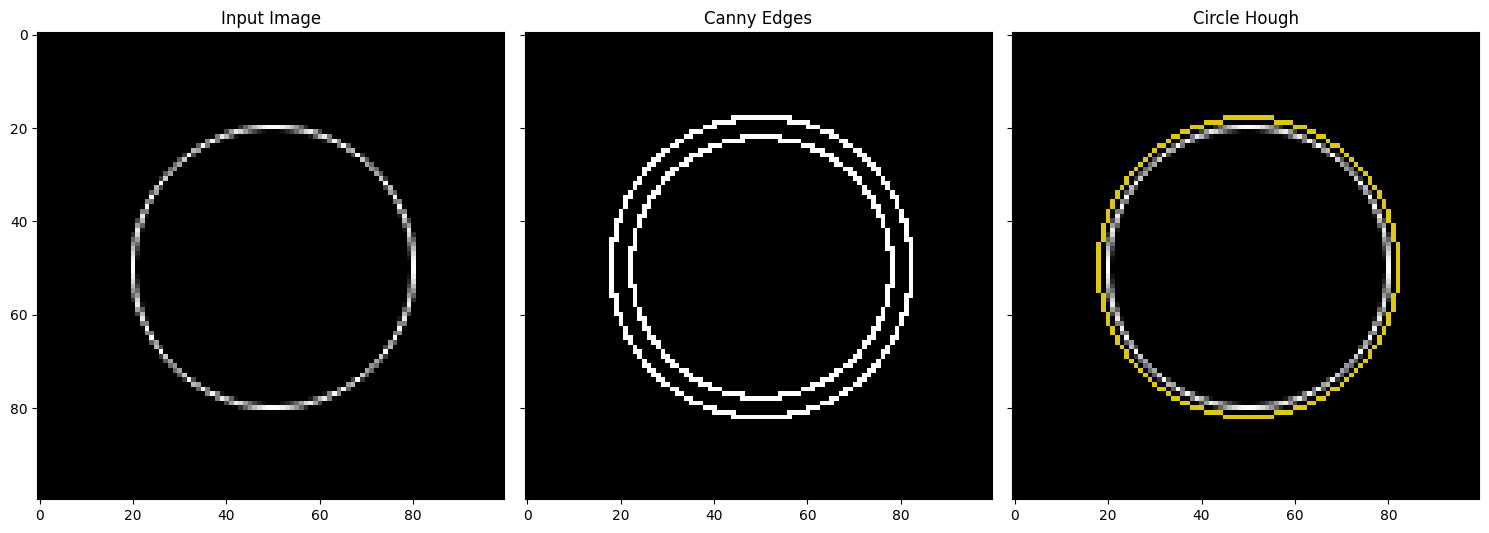

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import color
from skimage.transform import hough_circle, hough_circle_peaks
from skimage.feature import canny
from skimage.draw import circle_perimeter
from skimage.util import img_as_ubyte
from skimage.draw import circle_perimeter_aa
from matplotlib import cm

image = np.zeros((100, 100), dtype=np.double)
rr, cc, val = circle_perimeter_aa(50, 50, 30)
image[rr, cc] = val
image = img_as_ubyte(image)

edges = canny(image, 2)

hough_radii = np.arange(20, 35, 2)
hough_res = hough_circle(edges, hough_radii)

accums, cx, cy, radii = hough_circle_peaks(hough_res, hough_radii, total_num_peaks=1)

fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharex=True, sharey=True)
ax = axes.ravel()
circled_image = color.gray2rgb(image)

for center_y, center_x, radius in zip(cy, cx, radii):
    circy, circx = circle_perimeter(center_y, center_x, radius, shape=circled_image.shape)
    circled_image[circy, circx] = (220, 200, 20)

ax[0].imshow(image, cmap=cm.gray)
ax[0].set_title('Input Image')

ax[1].imshow(edges, cmap=cm.gray)
ax[1].set_title('Canny Edges')

ax[2].imshow(circled_image, cmap=cm.gray)
ax[2].set_title('Circle Hough')

plt.tight_layout()
plt.show()

With Gaussian Noise

C:\Users\rkbij\AppData\Local\Temp\ipykernel_18600\3235486831.py:17: FutureWarning: `seed` is a deprecated argument name for `random_noise`. It will be removed in version 0.23. Please use `rng` instead.
  image = random_noise(image, mode='gaussian', seed=25, clip=True)


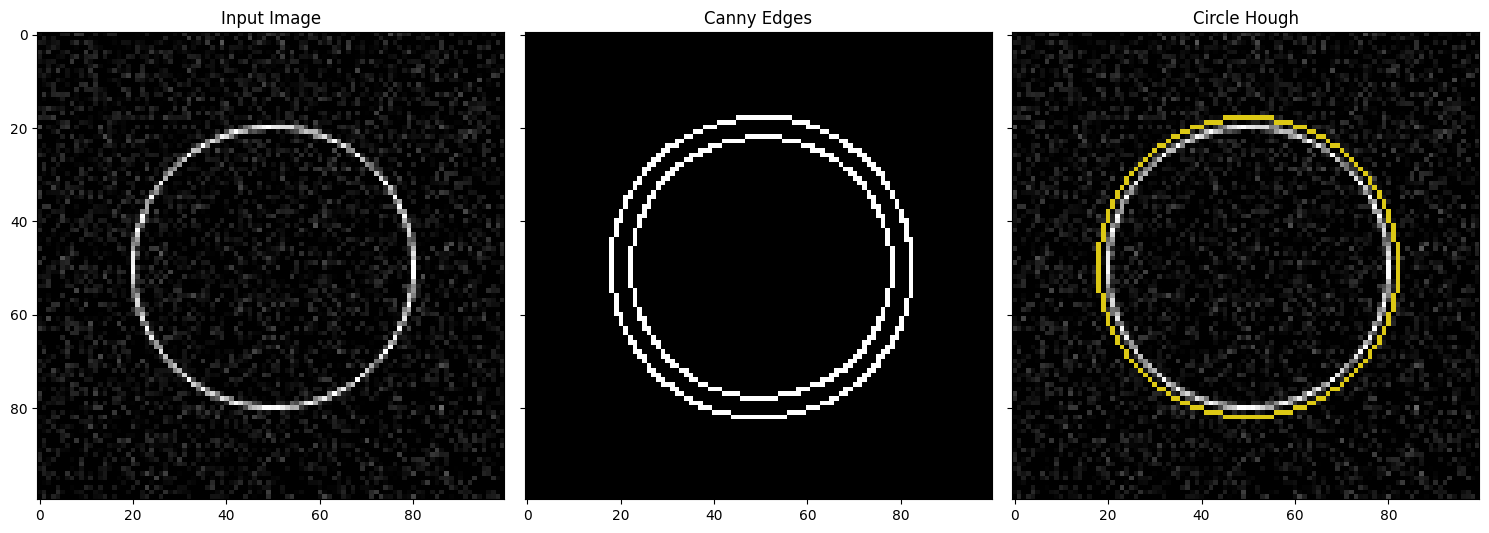

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import color
from skimage.transform import hough_circle, hough_circle_peaks
from skimage.feature import canny
from skimage.draw import circle_perimeter
from skimage.util import img_as_ubyte
from skimage.draw import circle_perimeter_aa
from skimage.util import random_noise
from matplotlib import cm

image = np.zeros((100, 100), dtype=np.double)
rr, cc, val = circle_perimeter_aa(50, 50, 30)
image[rr, cc] = val
image = random_noise(image, mode='gaussian', seed=25, clip=True)
image = img_as_ubyte(image)

edges = canny(image, 2)

hough_radii = np.arange(20, 35, 2)
hough_res = hough_circle(edges, hough_radii)

accums, cx, cy, radii = hough_circle_peaks(hough_res, hough_radii, total_num_peaks=1)

fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharex=True, sharey=True)
ax = axes.ravel()
circled_image = color.gray2rgb(image)

for center_y, center_x, radius in zip(cy, cx, radii):
    circy, circx = circle_perimeter(center_y, center_x, radius, shape=circled_image.shape)
    circled_image[circy, circx] = (220, 200, 20)

ax[0].imshow(image, cmap=cm.gray)
ax[0].set_title('Input Image')

ax[1].imshow(edges, cmap=cm.gray)
ax[1].set_title('Canny Edges')

ax[2].imshow(circled_image, cmap=cm.gray)
ax[2].set_title('Circle Hough')

plt.tight_layout()
plt.show()